<a href="https://colab.research.google.com/github/Haile143/Talking_Data_Ensemble/blob/main/Fraud_detctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries



In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

# Reading Data

In [2]:
data=pd.read_csv('/content/drive/MyDrive/dataScience/talking_data.csv')

In [3]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


# Understanding data

In [4]:
data.shape

(100000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [6]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


# Preprocessing Data

In [7]:
data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [8]:
data['ip'].nunique()

34857

In [9]:
data['app'].nunique()

161

In [10]:
data['device'].nunique()

100

In [11]:
data['os'].nunique()

130

In [12]:
data['channel'].nunique()

161

In [13]:
data['datetime']=pd.to_datetime(data['click_time'])
data['day_of_week']=data['datetime'].dt.day_of_week
data['day_of_year']=data['datetime'].dt.day_of_year
data['month']=data['datetime'].dt.month
data['hour']=data['datetime'].dt.hour

In [14]:
data.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,datetime,day_of_week,day_of_year,month,hour
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,2017-11-09 13:25:41,3,313,11,13
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2017-11-07 11:25:43,1,311,11,11
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2017-11-08 11:38:42,2,312,11,11
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2017-11-08 17:55:21,2,312,11,17
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0,2017-11-07 14:32:27,1,311,11,14


In [15]:
data.drop(['attributed_time','click_time','datetime'],axis=1,inplace=True)


In [16]:
data.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


# spliting Data into x , y variable

In [17]:
X=data.drop(['is_attributed'],axis=1)
y=data['is_attributed']

# Data Balancing

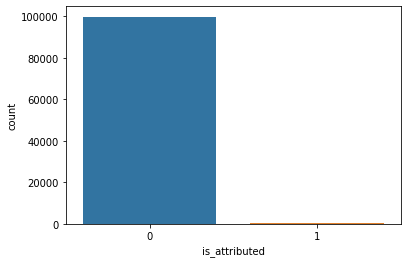

In [18]:
sns.countplot(y)
plt.show()

In [19]:
y.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X,y)
print(y_sm.value_counts())

0    99773
1    99773
Name: is_attributed, dtype: int64


# Creating Train Test set for model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20)

# Ensemble techniques

### Importing XGB and feeding data into the model, It is a boosting algo

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbl=XGBClassifier()
xgbl.fit(X_train,y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,y_test)

### Score

In [23]:
xgbl_score

0.9583813580556252

In [24]:
print(metrics.confusion_matrix(y_test,test_pred))

[[19083   731]
 [  930 19166]]


In [25]:
data.isnull().values.any()

False

### Adaboost this algo is also a boosting algorythm

In [26]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.9278376346780256
The confusion matrix of Adaboost Ensemble model is
[[18363  1451]
 [ 1429 18667]]


### Performing Bagging classifier and checking score

In [27]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=30, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9973941368078176
The confusion matrix of Bagging classifier model is
[[19739    75]
 [   29 20067]]


# Comparing between bagging model and boosting model's SCORE.


In [28]:
#print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}%".format(abcl_score*100))
print("The Bagging classifier model accuracy is {}%".format(bgcl_score*100))


The Adaboost Ensemble model accuracy is 92.78376346780256%
The Bagging classifier model accuracy is 99.73941368078177%


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19814
           1       1.00      1.00      1.00     20096

    accuracy                           1.00     39910
   macro avg       1.00      1.00      1.00     39910
weighted avg       1.00      1.00      1.00     39910



In [31]:
y_pred1=bgcl.predict_proba(X_test)
y_pred1

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.8       , 0.2       ],
       ...,
       [0.86666667, 0.13333333],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [32]:
# AUC/ROC for bagging classifier
roc=metrics.roc_auc_score(y_test,y_pred1[:,1])
print(roc)

0.9996888609851877


In [33]:
auc=metrics.roc_auc_score(y_test,y_pred1[:,1])
print(auc*100)

99.96888609851877
